<a href="https://colab.research.google.com/github/Gabriel-S-Santos/curso-data-analysis/blob/main/pandas_bitcoin_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import requests
import pandas as pd

In [1]:
def get_historic_price(symbol, exchange="bitfinex", after="2018-09-01"):
  url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(symbol=symbol, exchange=exchange)
  resp = requests.get(url, params={
      'periods': '3600',
      'after': str(int(pd.Timestamp(after).timestamp()))
  })

  resp.raise_for_status()
  data = resp.json()
  df = pd.DataFrame(data['result']['3600'], columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'])
  df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
  df.set_index('CloseTime', inplace=True)
  return df


In [4]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-11-08 17:55:10.804008')

In [5]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)
btc

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-11-08 18:00:00,20391,20436,19339,19340,684.360708,1.359334e+07
2022-11-08 19:00:00,19340,19538,18433,18612,2117.332738,3.988862e+07
2022-11-08 20:00:00,18591,18722,17114,18280,2132.479344,3.864715e+07
2022-11-08 21:00:00,18284,18487,17867,18162,1254.589530,2.284696e+07
2022-11-08 22:00:00,18160,18711,18146,18701,594.433067,1.092563e+07
...,...,...,...,...,...,...
2022-11-15 14:00:00,16818,17095,16817,16991,446.237672,7.573125e+06
2022-11-15 15:00:00,16987,16987,16809,16915,344.311669,5.824150e+06
2022-11-15 16:00:00,16918,17060,16865,16981,388.265456,6.577924e+06


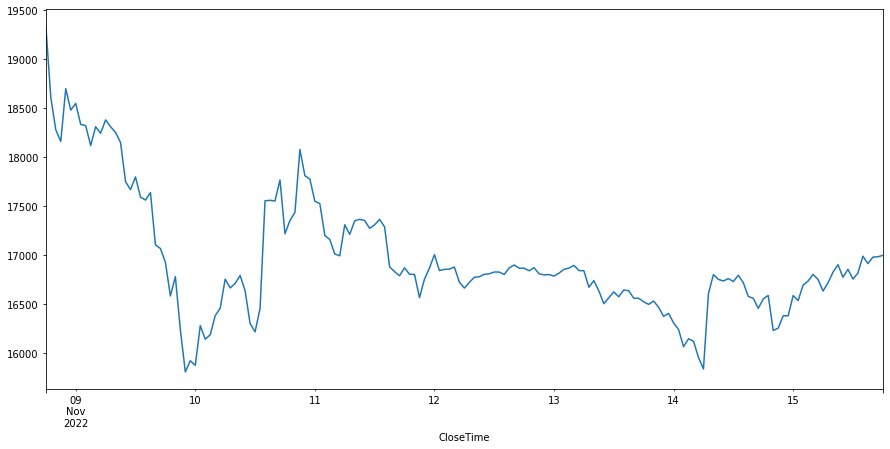

In [6]:
btc['ClosePrice'].plot(figsize=(15, 7))